# EDA with Gemini

In [ ]:
import google.generativeai as genai
import pandas as pd
import vertexai
from vertexai.generative_models import GenerativeModel, ChatSession

PROJECT_ID = ""  # Your Google Cloud Project ID
GOOGLE_API_KEY = ""  # Your Google API Key

vertexai.init(project=PROJECT_ID, location="us-east1")

modell = GenerativeModel(model_name="gemini-1.5-pro")

chat = modell.start_chat()


def get_chat_response(chat: ChatSession, prompt: str) -> str:
    text_response = []
    responses = chat.send_message(prompt, stream=True)
    for chunk in responses:
        text_response.append(chunk.text)
    return "".join(text_response)


prompt = "Olá."
get_chat_response(chat, prompt)

'Olá! 👋  Como posso te ajudar hoje? 😄 \n'

In [ ]:
df = pd.read_csv('credit_default.csv')

In [ ]:
df.head()

,id,year,gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,upfront_charges,term,property_value,construction_type,income,credit_type,credit_score,age,ltv,region,status
0,24890,2019,Sex Not Available,nopre,type1,p1,nob/c,116500,NaN,NaN,360.0,118000.0,sb,1740.0,EXP,758,25-34,98.728814,south,1
1,24891,2019,Male,nopre,type2,p1,b/c,206500,NaN,NaN,360.0,NaN,sb,4980.0,EQUI,552,55-64,NaN,North,1
2,24892,2019,Male,pre,type1,p1,nob/c,406500,4.56,595.0,360.0,508000.0,sb,9480.0,EXP,834,35-44,80.019685,south,0
3,24893,2019,Male,nopre,type1,p4,nob/c,456500,4.25,NaN,360.0,658000.0,sb,11880.0,EXP,587,45-54,69.376900,North,0
4,24894,2019,Joint,pre,type1,p1,nob/c,696500,4.00,0.0,360.0,758000.0,sb,10440.0,CRIF,602,25-34,91.886544,North,0


In [ ]:
describe = df.describe(include=['object']).T

In [ ]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      148670 non-null  int64  
 1   year                    148670 non-null  int64  
 2   gender                  148670 non-null  object 
 3   approv_in_adv           147762 non-null  object 
 4   loan_type               148670 non-null  object 
 5   loan_purpose            148536 non-null  object 
 6   business_or_commercial  148670 non-null  object 
 7   loan_amount             148670 non-null  int64  
 8   rate_of_interest        112231 non-null  float64
 9   upfront_charges         109028 non-null  float64
 10  term                    148629 non-null  float64
 11  property_value          133572 non-null  float64
 12  construction_type       148670 non-null  object 
 13  income                  139520 non-null  float64
 14  credit_type         

In [ ]:
print(info)

None


In [ ]:
df.dtypes

,0
id,int64
year,int64
gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
business_or_commercial,object
loan_amount,int64
rate_of_interest,float64
upfront_charges,float64


In [ ]:
df.select_dtypes(include=['number']).isnull().sum()

,0
id,0
year,0
loan_amount,0
rate_of_interest,36439
upfront_charges,39642
term,41
property_value,15098
income,9150
credit_score,0
ltv,15098


In [ ]:
df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

,0
approv_in_adv,908
age,200
loan_purpose,134
gender,0
loan_type,0
business_or_commercial,0
construction_type,0
credit_type,0
region,0


In [ ]:
for column in df.columns:
    print('\n')
    print(df[column].value_counts())



id
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64


year
2019    148670
Name: count, dtype: int64


gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64


loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64


rate_of_interest
3.990    14455
3.625     8800
3.875     8592
3.750

In [ ]:
for column in df.columns:
    print(f"{df[column].value_counts(dropna=False)}\n")

id
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64

year
2019    148670
Name: count, dtype: int64

gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

rate_of_interest
NaN      36439
3.990    144

In [ ]:
sum_nas = df.isna().sum().sort_values(ascending=False)

In [ ]:
columns = df.columns

# CHAT

In [ ]:
prompt = f"Usando os dados com as colunas com esses nomes {df.columns} gere algumas possíveis descobertas"
get_chat_response(chat, prompt)

Com base nos nomes das colunas fornecidas, podemos explorar diversas hipóteses e gerar descobertas relevantes sobre os dados de crédito. Abaixo, apresento algumas possibilidades, divididas por categorias:

**Análise de Crédito:**

* **Relação entre score de crédito e taxa de juros:** Investigar se existe uma correlação negativa entre `credit_score` e `rate_of_interest`, indicando que clientes com maior score conseguem taxas melhores.
* **Impacto do tipo de crédito na aprovação:** Verificar se a variável `credit_type` influencia a probabilidade de `approv_in_adv`, comparando a taxa de aprovação entre diferentes tipos de crédito.
* **Perfil de risco por finalidade do empréstimo:** Analisar se a variável `loan_purpose` está relacionada ao `status` do empréstimo, identificando se certas finalidades possuem maior risco de inadimplência.
* **Influência da relação LTV na aprovação:**  Determinar se a variável `ltv` (Loan-to-Value) impacta a `approv_in_adv`, avaliando se empréstimos com maior 

In [ ]:
def split_dataframe(df, chunk_size=10000):
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i * chunk_size:(i + 1) * chunk_size])
    return chunks

In [ ]:
list_dfs = split_dataframe(df)

In [ ]:
len(list_dfs)

15

In [ ]:
chunks_string = list_dfs[0].to_string()
prompt = f"Armazene os dados e respoda com a palavra Continue para receber as perguntas sobre eles: {chunks_string}."
get_chat_response(chat, prompt)

'Continue\n'

In [ ]:
prompt = f"Show to discovery the biggest loan_amount using python? Don't forget to show the code"
print(get_chat_response(chat, prompt))

In [ ]:
prompt = f"Show me a code snippet to send you a sample dataframe"
print(get_chat_response(chat, prompt))

In [ ]:
prompt = f"How to use a dataframe as a chat input to a gemini model in python?"
print(get_chat_response(chat, prompt))

In [ ]:
df.columns

Index(['id', 'year', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'upfront_charges', 'term', 'property_value', 'construction_type',
       'income', 'credit_type', 'credit_score', 'age', 'ltv', 'region',
       'status'],
      dtype='object')

In [ ]:
df['income'].describe()

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

In [ ]:
income_stats = df['income'].describe()
prompt = f"Show me hoe to get insights from this income data {income_stats}."
print(get_chat_response(chat, prompt))

In [ ]:
income_stats = df.describe()
prompt = f"Receive this information from all columns in a dataset {income_stats}."
print(get_chat_response(chat, prompt))

In [ ]:
income_stats = df.head()
prompt = f"Receive this information from all columns in a dataset {income_stats}."
print(get_chat_response(chat, prompt))

In [ ]:
prompt = f"além dos dados anteriores receba a lista de colunas: {columns}"
print(get_chat_response(chat, prompt))

Ótimo! Agora com a lista de colunas, posso te dar uma análise mais aprofundada das tendências nos dados, considerando o significado de cada variável. 

**Hipóteses e Tendências:**

1. **Perfil do Cliente:**
    * **Gênero:** Investigar se há disparidade na aprovação de empréstimos entre gêneros ('gender' e 'status'). Analisar se o valor do empréstimo ('loan_amount') varia entre os gêneros.
    * **Idade:**  Comparar a taxa de aprovação e o valor médio do empréstimo entre as faixas etárias ('age' e 'status'/'loan_amount').
    * **Renda:** Analisar a relação entre renda ('income') e a probabilidade de aprovação ('status'), e se clientes com renda maior tendem a solicitar empréstimos maiores ('loan_amount').
    * **Score de Crédito:** Verificar se o 'credit_score' é um forte preditor de aprovação ('status') e se influencia a taxa de juros ('rate_of_interest')  

2. **Características do Empréstimo:**
    * **Tipo de Empréstimo:** Avaliar se a taxa de aprovação e as taxas de juros ('rate_

In [ ]:
prompt = f"além dos dados anteriores receba os describe do dataframe: {describe}"
print(get_chat_response(chat, prompt))

Perfeito! Agora com as informações do `describe` do dataframe, podemos começar a identificar algumas tendências gerais nos dados, complementando a análise preliminar que fiz anteriormente.

**Observações:**

* **Gênero:** A categoria "Male" é a mais frequente, com 42346 ocorrências. É necessário analisar a proporção em relação aos outros gêneros e se essa diferença impacta na aprovação do empréstimo.
* **Aprovação Prévia:** A maioria dos empréstimos (124621) **não** possui aprovação prévia ("nopre"). Isso pode indicar uma política da instituição financeira de aprovar empréstimos mesmo sem a pré-aprovação, ou uma preferência dos clientes por essa modalidade. Investigar a relação com a variável 'status' para verificar se a falta de aprovação prévia impacta na taxa de aprovação.
* **Tipo de Empréstimo:**  "type1" é o tipo de empréstimo dominante (113173).   Comparar a performance desse tipo com os demais em relação a 'status' e 'rate_of_interest'.  
* **Finalidade do Empréstimo:**  "p3" é

In [ ]:
prompt = f"além dos dados anteriores receba a soma dos valores nulos por coluna: {sum_nas}"
print(get_chat_response(chat, prompt))

Excelente! A informação sobre a quantidade de valores nulos por coluna é muito útil para planejar a limpeza e o pré-processamento dos dados. 

**Observações sobre os Valores Nulos:**

* **'upfront_charges' e 'rate_of_interest':**  A grande quantidade de valores nulos nessas colunas (39642 e 36439, respectivamente) sugere um problema na coleta desses dados, ou possivelmente uma política da instituição financeira de não cobrar taxas antecipadas ('upfront_charges') ou de ter taxas de juros ('rate_of_interest') variáveis que não foram registradas.

* **'ltv' e 'property_value':** A mesma quantidade de valores nulos (15098) em 'ltv' (Loan-to-Value ratio) e 'property_value' sugere que esses dados faltantes podem estar relacionados.  É possível que a falta do valor do imóvel impossibilite o cálculo do LTV.

* **'income':** A coluna 'income' (renda)  também apresenta uma quantidade significativa de valores nulos (9150).  A falta da informação de renda pode estar relacionada à dificuldade de co

In [ ]:
prompt = f"como uma pessoa especialista em dados, baseado nos dados que recebeu anteriormente, quais são as principais tendências desses dados?"
print(get_chat_response(chat, prompt))

Com base nas informações fornecidas - as primeiras linhas do dataframe, a lista de colunas e o resultado do `describe` - podemos destacar algumas tendências, ainda que limitadas pela falta do dataframe completo:

**Tendências:**

* **Domínio Masculino:** Os dados indicam um volume maior de homens solicitando empréstimos, representando quase 30% do total, contra aproximadamente 10% de mulheres e 60% sem informação de gênero. Essa diferença sugere a necessidade de investigar se há viés na aprovação de empréstimos, favorecendo homens em detrimento de mulheres.

* **Empréstimos para Fins Diversos:** O tipo de empréstimo "type1" predomina, mas a finalidade "p3" é a mais frequente. Isso sugere que "type1" pode abranger diversas finalidades. A análise da relação entre 'loan_type' e 'loan_purpose' se torna crucial para entender as características de cada tipo de empréstimo e sua finalidade mais comum.

* **Região "North" Concentradora:** "North" lidera em número de empréstimos, com o dobro das

In [ ]:
prompt = f"crie códigos em python para fazer validação da analise dessas tendências"
print(get_chat_response(chat, prompt))

Você está certo! Para validar as tendências que levantamos, precisamos analisar o dataframe completo com código Python. 

Como não temos o dataframe, vou fornecer exemplos de código para cada tendência, **assumindo que `df` é o seu dataframe**. Adapte os nomes das colunas e os valores conforme necessário.

**1. Domínio Masculino e Possível Viés de Gênero:**

```python
import pandas as pd
import matplotlib.pyplot as plt

# Calcula a proporção de cada gênero
gender_counts = df['gender'].value_counts(normalize=True)
print(gender_counts)

# Cria um gráfico de barras
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Proporção de Empréstimos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.show()

# Calcula a taxa de aprovação por gênero
approval_rate_by_gender = df.groupby('gender')['status'].mean()
print(approval_rate_by_gender)

# Cria um gráfico de barras da taxa de aprovação
plt.figure(figsize=(8, 6))
approval_rate_by_gender.plot(kind='bar')
plt.title('Ta

# RAG

In [ ]:
!pip install langchain
!pip install chromadb
!pip install langchain_google_genai
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.2/974.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
genai.configure(api_key=GOOGLE_API_KEY)
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:

from langchain.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.document_loaders import DataFrameLoader
from langchain_text_splitters import CharacterTextSplitter

In [ ]:
loader = DataFrameLoader(list_dfs[0], page_content_column="id")
data = loader.load()

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(data)

In [ ]:
docs

[Document(page_content='24890', metadata={'year': 2019, 'gender': 'Sex Not Available', 'approv_in_adv': 'nopre', 'loan_type': 'type1', 'loan_purpose': 'p1', 'business_or_commercial': 'nob/c', 'loan_amount': 116500, 'rate_of_interest': nan, 'upfront_charges': nan, 'term': 360.0, 'property_value': 118000.0, 'construction_type': 'sb', 'income': 1740.0, 'credit_type': 'EXP', 'credit_score': 758, 'age': '25-34', 'ltv': 98.72881356, 'region': 'south', 'status': 1}),
 Document(page_content='24891', metadata={'year': 2019, 'gender': 'Male', 'approv_in_adv': 'nopre', 'loan_type': 'type2', 'loan_purpose': 'p1', 'business_or_commercial': 'b/c', 'loan_amount': 206500, 'rate_of_interest': nan, 'upfront_charges': nan, 'term': 360.0, 'property_value': nan, 'construction_type': 'sb', 'income': 4980.0, 'credit_type': 'EQUI', 'credit_score': 552, 'age': '55-64', 'ltv': nan, 'region': 'North', 'status': 1}),
 Document(page_content='24892', metadata={'year': 2019, 'gender': 'Male', 'approv_in_adv': 'pre',

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
searcher = Chroma.from_documents(docs, embeddings).as_retriever()

In [ ]:
q = "Qual o maior emprestimo concedido?"
records = searcher.get_relevant_documents(q)
records

[Document(page_content='54999', metadata={'age': '>74', 'approv_in_adv': 'nopre', 'business_or_commercial': 'nob/c', 'construction_type': 'sb', 'credit_score': 757, 'credit_type': 'CIB', 'gender': 'Male', 'income': 1680.0, 'loan_amount': 146500, 'loan_purpose': 'p4', 'loan_type': 'type1', 'ltv': 87.20238095, 'property_value': 168000.0, 'rate_of_interest': 4.5, 'region': 'North', 'status': 0, 'term': 360.0, 'upfront_charges': 3325.0, 'year': 2019}),
 Document(page_content='59888', metadata={'age': '25-34', 'approv_in_adv': 'nopre', 'business_or_commercial': 'nob/c', 'construction_type': 'sb', 'credit_score': 577, 'credit_type': 'EQUI', 'gender': 'Female', 'income': 8520.0, 'loan_amount': 126500, 'loan_purpose': 'p1', 'loan_type': 'type1', 'region': 'North', 'status': 1, 'term': 360.0, 'year': 2019}),
 Document(page_content='59999', metadata={'age': '45-54', 'approv_in_adv': 'pre', 'business_or_commercial': 'nob/c', 'construction_type': 'sb', 'credit_score': 825, 'credit_type': 'CIB', 'g

In [ ]:
modelll = GenerativeModel(model_name="gemini-1.5-pro")

In [ ]:
prompt = f"Qual o maior emprestimo concedido?"
modelll.count_tokens(prompt)

total_tokens: 8
total_billable_characters: 30

In [ ]:
modelll.generate_content(prompt).text

'Preciso de mais informações para responder a sua pergunta sobre o maior empréstimo concedido. Para te dar uma resposta precisa, me diga:\n\n* **Empréstimo para quem?**  Você está procurando o maior empréstimo já concedido a um indivíduo, empresa, país ou outro tipo de instituição?\n* **Em que área?** O maior empréstimo imobiliário será diferente do maior empréstimo estudantil, por exemplo.\n* **Em que país?** As leis e práticas de empréstimo variam de país para país, então o maior empréstimo concedido no Brasil será diferente do maior empréstimo concedido nos Estados Unidos.\n\nPor favor, me forneça mais detalhes para que eu possa te ajudar da melhor maneira possível! \n'

In [ ]:
prompt_template = """
Você deve responder à pergunta a partir do contexto fornecido e certificar-se de fornecer todos os detalhes\n
Context: {context}\n
Question: {question}\n

Answer:
"""
prompt = PromptTemplate(template=prompt_template, input_variables=["context", "question"])
model = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=1)
chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

response = chain({"input_documents": records, "question": q}, return_only_outputs=True)
response['output_text']

'O maior empréstimo concedido é **60998**. \n'

In [ ]:
prompt_template = """
Você deve responder à pergunta a partir do contexto fornecido e certificar-se de fornecer todos os detalhes\n
Context: {context}\n
Question: {question}\n

Answer:
"""
prompt = PromptTemplate(template=prompt_template, input_variables=["context", "question"])
model = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.6)
response = model.count_tokens(prompt)
response

In [ ]:
q = "quantos homens"
records = searcher.get_relevant_documents(q)
records

[Document(page_content='159912\n\n159913\n\n159914\n\n159915\n\n159916\n\n159917\n\n159918\n\n159919\n\n159920\n\n159921\n\n159922\n\n159923\n\n159924\n\n159925\n\n159926\n\n159927\n\n159928\n\n159929\n\n159930\n\n159931\n\n159932\n\n159933\n\n159934\n\n159935\n\n159936\n\n159937\n\n159938\n\n159939\n\n159940\n\n159941\n\n159942\n\n159943\n\n159944\n\n159945\n\n159946\n\n159947\n\n159948\n\n159949\n\n159950\n\n159951\n\n159952\n\n159953\n\n159954\n\n159955\n\n159956\n\n159957\n\n159958\n\n159959\n\n159960\n\n159961\n\n159962\n\n159963\n\n159964\n\n159965\n\n159966\n\n159967\n\n159968\n\n159969\n\n159970\n\n159971\n\n159972\n\n159973'),
 Document(page_content='100897\n\n100898\n\n100899\n\n100900\n\n100901\n\n100902\n\n100903\n\n100904\n\n100905\n\n100906\n\n100907\n\n100908\n\n100909\n\n100910\n\n100911\n\n100912\n\n100913\n\n100914\n\n100915\n\n100916\n\n100917\n\n100918\n\n100919\n\n100920\n\n100921\n\n100922\n\n100923\n\n100924\n\n100925\n\n100926\n\n100927\n\n100928\n\n100929\n\n10

In [ ]:
list_dfs[0].sort_values(by=['loan_amount'], ascending=False)

,id,year,gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,upfront_charges,term,property_value,construction_type,income,credit_type,credit_score,age,ltv,region,status
4321,29211,2019,Male,nopre,type1,p1,nob/c,3576500,NaN,NaN,360.0,5208000.0,sb,119340.0,EXP,751,55-64,68.673195,North,1
3762,28652,2019,Male,nopre,type1,p1,nob/c,3006500,3.99,60000.00,360.0,5258000.0,sb,50580.0,CRIF,620,45-54,57.179536,North,0
7343,32233,2019,Sex Not Available,nopre,type1,p1,nob/c,2106500,NaN,NaN,180.0,3078000.0,sb,86340.0,CRIF,813,45-54,68.437297,south,1
1715,26605,2019,Sex Not Available,nopre,type1,p1,nob/c,2006500,NaN,NaN,324.0,NaN,sb,38640.0,EQUI,837,45-54,NaN,south,1
5560,30450,2019,Joint,nopre,type1,p4,nob/c,1806500,NaN,NaN,360.0,NaN,sb,21720.0,EQUI,554,35-44,NaN,south,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,29162,2019,Male,nopre,type3,p1,nob/c,36500,4.25,850.89,360.0,38000.0,sb,1320.0,CIB,896,35-44,96.052632,North,0
4354,29244,2019,Male,nopre,type2,p1,b/c,36500,4.75,1024.22,360.0,48000.0,sb,1860.0,CRIF,837,25-34,76.041667,central,0
4343,29233,2019,Sex Not Available,nopre,type2,p2,b/c,36500,NaN,NaN,360.0,68000.0,sb,1380.0,CRIF,777,55-64,53.676471,south,1
2991,27881,2019,Male,nopre,type2,p1,b/c,36500,NaN,NaN,360.0,NaN,sb,7020.0,EQUI,836,45-54,NaN,North,1


In [ ]:
df

,id,year,gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,upfront_charges,term,property_value,construction_type,income,credit_type,credit_score,age,ltv,region,status
0,24890,2019,Sex Not Available,nopre,type1,p1,nob/c,116500,NaN,NaN,360.0,118000.0,sb,1740.0,EXP,758,25-34,98.728814,south,1
1,24891,2019,Male,nopre,type2,p1,b/c,206500,NaN,NaN,360.0,NaN,sb,4980.0,EQUI,552,55-64,NaN,North,1
2,24892,2019,Male,pre,type1,p1,nob/c,406500,4.560,595.00,360.0,508000.0,sb,9480.0,EXP,834,35-44,80.019685,south,0
3,24893,2019,Male,nopre,type1,p4,nob/c,456500,4.250,NaN,360.0,658000.0,sb,11880.0,EXP,587,45-54,69.376900,North,0
4,24894,2019,Joint,pre,type1,p1,nob/c,696500,4.000,0.00,360.0,758000.0,sb,10440.0,CRIF,602,25-34,91.886544,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,Sex Not Available,nopre,type1,p3,nob/c,436500,3.125,9960.00,180.0,608000.0,sb,7860.0,CIB,659,55-64,71.792763,south,0
148666,173556,2019,Male,nopre,type1,p1,nob/c,586500,5.190,0.00,360.0,788000.0,sb,7140.0,CIB,569,25-34,74.428934,south,0
148667,173557,2019,Male,nopre,type1,p4,nob/c,446500,3.125,1226.64,180.0,728000.0,sb,6900.0,CIB,702,45-54,61.332418,North,0
148668,173558,2019,Female,nopre,type1,p4,nob/c,196500,3.500,4323.33,180.0,278000.0,sb,7140.0,EXP,737,55-64,70.683453,North,0


# IMAGE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_default.csv')

df.boxplot(column='loan_amount')
plt.show()

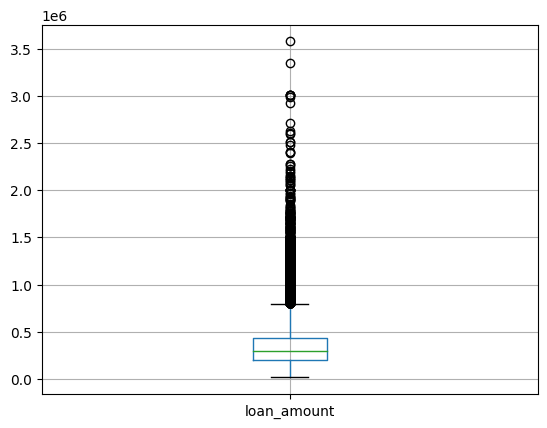

In [ ]:
import io
import base64
import matplotlib.pyplot as plt

myFig = plt.figure()
df.boxplot(column='loan_amount')
buf = io.BytesIO()
plt.savefig(buf, format='png')
data_img = base64.b64encode(buf.getbuffer()).decode('utf-8')

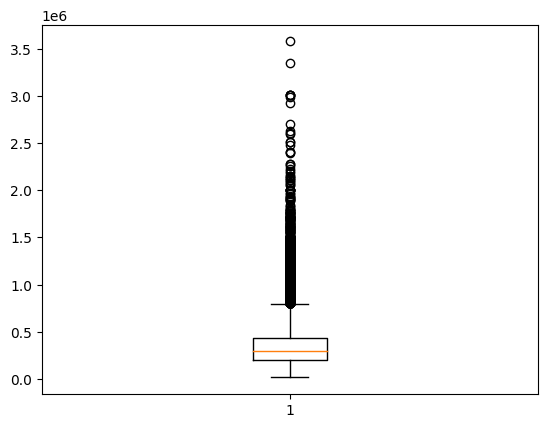

In [ ]:
plt.boxplot(df['loan_amount'])
plt.savefig('loan_amount_boxplot.png')

In [ ]:
import io
import matplotlib.pyplot as plt

plt.boxplot(df['loan_amount'])

buf = io.BytesIO()
plt.savefig(buf, format='png')

# Encode the buffer as a base64 string
data = base64.b64encode(buf.getbuffer()).decode('ascii')

In [ ]:

from vertexai.generative_models import GenerativeModel, Part

In [ ]:
model = GenerativeModel(model_name="gemini-1.5-pro")
encoded_image = base64.b64encode(open("loan_amount_boxplot.png", "rb").read()).decode("utf-8")
image_content = Part.from_data(
    data=base64.b64decode(encoded_image), mime_type="image/png"
)
response = model.generate_content([image_content, "Quais analises podemos fazer em cima desse boxplot de emprestimo?"])
response.text

O boxplot que você forneceu traz algumas informações importantes sobre a variável "loan_amount" (valor do empréstimo):

**Presença de outliers:**

* Observa-se uma quantidade significativa de outliers (pontos acima do "bigode" superior do boxplot), indicando a existência de empréstimos com valores muito acima da maioria. Isso pode indicar:
    * **Diversidade de clientes:**  A instituição financeira pode trabalhar com um público que solicita desde empréstimos pequenos até muito grandes.
    * **Tipos diferentes de empréstimo:**  Pode haver diferentes produtos de crédito, como empréstimos pessoais e empresariais, impactando na variação dos valores.
    * **Risco de crédito:**  Empréstimos muito altos podem representar maior risco para a instituição, o que exige uma análise mais aprofundada.

**Assimetria à direita:**

* A "caixa" do boxplot (que representa a dispersão de 50% dos dados) é curta e a "linha" dentro da caixa (representando a mediana) está mais próxima do limite inferior.  I

In [ ]:
# prompt: matplot encode as base64 data

import base64
import io
import matplotlib.pyplot as plt

# Generate the plot
plt.plot([1, 2, 3, 4])
plt.xlabel('X')
plt.ylabel('Y')

# Save the plot to a buffer
buf = io.BytesIO()
plt.savefig(buf, format='png')

# Encode the buffer as a base64 string
data = base64.b64encode(buf.getbuffer()).decode('ascii')

# Print the base64 string
print(data)